<a href="https://colab.research.google.com/github/pinkittys/assignment/blob/main/BIZ581_HW2_20249379_%EC%A0%95%EC%84%A0%EC%95%84F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Setup : Load Data**



In [110]:
# 필수 라이브러리 임포트
import pandas as pd # DataFrame을 다루는 데이터 전처리 패키지
import matplotlib.pyplot as plt # 기본 시각화 패키지
import seaborn as sns # 고급 시각화 패키지
from scipy import stats # statistics tools
import statsmodels.api as sm # linear models

In [111]:
# 데이터 불러오기
df = pd.read_csv('/content/banking.csv')

In [112]:
# 데이터 구조 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        31634 non-null  int64  
 1   profit    31634 non-null  int64  
 2   tenure    31634 non-null  float64
 3   district  31634 non-null  int64  
 4   online    31634 non-null  int64  
 5   inc       23373 non-null  float64
 6   age       23345 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.7 MB


,id,profit,tenure,district,online,inc,age
0,6460,2071,23.75,1200,0,7.0,5.0
1,1262,2063,2.75,1200,0,9.0,3.0
2,29876,2062,1.25,1200,0,7.0,4.0
3,30182,2062,21.25,1200,0,5.0,5.0
4,24636,2061,21.16,1200,0,9.0,4.0


In [113]:
# 데이터 컬럼 이름 확인
df.columns

Index(['id', 'profit', 'tenure', 'district', 'online', 'inc', 'age'], dtype='object')

In [114]:
# 데이터 분표 요약
df.describe()

,id,profit,tenure,district,online,inc,age
count,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000,23373.000000,23345.000000
mean,15817.500000,111.502687,10.162690,1203.186445,0.121831,5.458777,4.046048
std,9132.093544,272.839391,8.453867,47.906512,0.327096,2.346881,1.642316
min,1.000000,-221.000000,0.160000,1100.000000,0.000000,1.000000,1.000000
25%,7909.250000,-34.000000,3.750000,1200.000000,0.000000,4.000000,3.000000
50%,15817.500000,9.000000,7.410000,1200.000000,0.000000,6.000000,4.000000
75%,23725.750000,164.000000,14.750000,1200.000000,0.000000,7.000000,5.000000
max,31634.000000,2071.000000,41.160000,1300.000000,1.000000,9.000000,7.000000


# **Q1. Plot a Histogram of Profitability**
using 30 bins (number of bins, not the size of each bin). Describe the distribution of this variable.


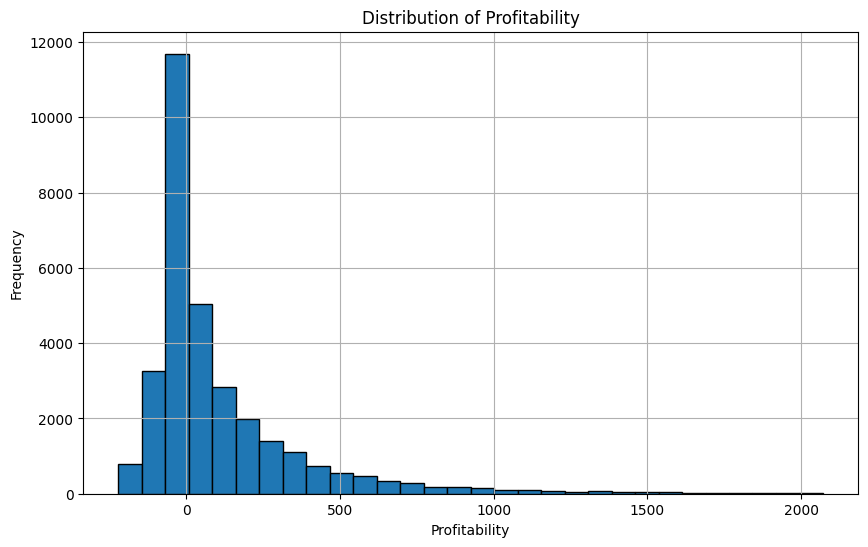

In [115]:
# 수익성 히스토그램 그리기
plt.figure(figsize=(10,6))
plt.hist(df['profit'], bins=30, edgecolor='black')
plt.title('Distribution of Profitability')
plt.xlabel('Profitability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


해석 : 위 히스토그램이 왼쪽으로 치우쳐 있는 모습을 통해 수익성이 낮은 고객들이 대부분이라는 것을 알 수 있다.

# **Q2. What percentage of customers are “online” customers?**


In [116]:
# 온라인 고객 비율 계산
online_count = df['online'].sum()  # 즉, 온라인 고객 수(=1)세기
total_customers = len(df)  # 전체 고객 수
online_percentage = (online_count / total_customers) * 100  # 온라인 고객 수/ 전체 고객 수 비율 계산
print(f"온라인 고객 비중: {online_percentage:.2f}%")


온라인 고객 비중: 12.18%


해석 : 이 은행은 온라인 고객 채택 비중이 비교적 낮다는 것을 알 수 있다.

# **# Q3.**

### Q3-1. Compare the difference of average profits between online and offline customers.

In [117]:
# 온라인과 오프라인 고객의 평균 수익성 비교
online_profit = df['profit'][df['online'] == 1] #온라인 고객 수익성 변수 지정
offline_profit = df['profit'][df['online'] == 0] #오프라인 고객 수익성 변수 지정

# 평균 계산
avg_online_profit = online_profit.mean()
avg_offline_profit = offline_profit.mean()

# 결과 출력
print(f"온라인 고객의 평균 수익성: {avg_online_profit:.2f}")
print(f"오프라인 고객의 평균 수익성: {avg_offline_profit:.2f}")

온라인 고객의 평균 수익성: 116.67
오프라인 고객의 평균 수익성: 110.79


### Q3-2. Then, run an independent-samples t-test for hypothesis testing (about population).

In [118]:
# 가설 수립 (H0, H1)
print("H0: 온라인 고객과 오프라인 고객의 평균 수익성 차이는 없다. (μ_online - μ_offline = 0)")
print("H1: 온라인 고객과 오프라인 고객의 평균 수익성 차이가 있다. (μ_online - μ_offline ≠ 0)")

# 독립 표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(online_profit, offline_profit, equal_var=False)

# 결과 출력
print(f"T-통계량: {t_statistic:.4f}")
print(f"P-값: {p_value:.4f}")

H0: 온라인 고객과 오프라인 고객의 평균 수익성 차이는 없다. (μ_online - μ_offline = 0)
H1: 온라인 고객과 오프라인 고객의 평균 수익성 차이가 있다. (μ_online - μ_offline ≠ 0)
T-통계량: 1.2124
P-값: 0.2254


### Q3-3. Interpret the outcome.

In [119]:
# 결과 해석
alpha = 0.05  # 유의 수준 설정
if p_value < alpha:
    print(f"p-value ({p_value:.4f})가 유의수준 ({alpha})보다 작으므로, H0 기각.")
    print("결론: 온라인 고객과 오프라인 고객의 평균 수익성에 유의미한 차이가 있습니다.")
else:
    print(f"p-value ({p_value:.4f})가 유의수준 ({alpha})보다 크므로, H0 기각 실패.")
    print("결론: 온라인 고객과 오프라인 고객의 평균 수익성 차이는 통계적으로 유의미하지 않다.\n즉, 온라인 고객과 오프라인 고객의 평균 수익성 차이가 없다.")

p-value (0.2254)가 유의수준 (0.05)보다 크므로, H0 기각 실패.
결론: 온라인 고객과 오프라인 고객의 평균 수익성 차이는 통계적으로 유의미하지 않다.
즉, 온라인 고객과 오프라인 고객의 평균 수익성 차이가 없다.


# **Q4. The manager believes the profitability of a customer should be related to tenure.**

### Q4-1. Run a linear regression analysis with two independent variables: online and tenure.

In [120]:
## 선형 회귀 분석 : 온라인과 거래 기간이 수익성에 미치는 영향
# 종속변수: profit 독립변수:online, tenure
model = sm.OLS.from_formula('profit ~ online + tenure', data=df).fit()

### Q4-2. Show and interpret the result.

In [121]:
# 모델 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     606.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          3.84e-259
Time:                        16:09:14   Log-Likelihood:            -2.2172e+05
No. Observations:               31634   AIC:                         4.435e+05
Df Residuals:                   31631   BIC:                         4.435e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3636      2.451     18.916      0.0

In [122]:
# 회귀 분석 결과 해석
# R-squared, F-statistic, Coefficients, P-values 주요 지표 정리
print("=== 회귀 분석 요약 ===")
print(f"R-squared: {model.rsquared:.4f}")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"Prob (F-statistic): {model.f_pvalue:.4e}")
print("\n=== 회귀 계수(Coefficients) ===")
print(model.params)

=== 회귀 분석 요약 ===
R-squared: 0.0369
F-statistic: 606.3590
Prob (F-statistic): 3.8402e-259

=== 회귀 계수(Coefficients) ===
Intercept    46.363642
online       16.552865
tenure        6.211189
dtype: float64


##해석

* R-squared - 0.0369 \
: 두 독립변수 (온라인 여부, 거래 기간)은 종속변수 (수익성)의 변동을 약 3.7% 설명할 수 있다.


*   F-statistic - 606.3590 \
: F-statistic값이 크고, p-value가 0에 가깝기 때문에, 본 회귀 모델은 통계적으로 유의미하다. 즉, 독립 변수(온라인 여부, 거래 기간)은 종속 변수(수익성)을 설명하는 데 기여하고 있다.


*   Coefficients \
: online 변수의 계수가 양수이므로, 온라인 고객일 때 수익성이 오프라인 고객보다 더 높고, tenure 변수의 계수도 양수이므로  거래 기간이 길어질수록 수익성이 높아진다는 것을 알 수 있다.

* P-value \
: 각 독립변수의 p-value가 0.05보다 작기 때문에 해당 변수를 통한 회귀 모델이 통계적으로 유의미하다.

\
## 결론

*   온라인 고객은 오프라인 고객에 비해 더 높은 수익성을 보일 가능성이 크다.
* 거래 기간이 길수록 수익성이 증가하므로, 장기 고객을 유지하는 것이 수익성 증대에 긍정적인 영향을 미칠 수 있다.
* 모델의 R-squared 값이 낮은 편이므로, 설명력이 부족할 수 있으므로 다른 변수를 추가해 모델 개선을 고려할 수 있다.

# **Q5.**

### Convert district variable to a factor variable.

In [123]:
# district 변수를 범주형 변수로 변경
df['district'] = df['district'].astype('category')

# district 변수의 고유값 확인
print(df['district'].unique())


[1200, 1100, 1300]
Categories (3, int64): [1100, 1200, 1300]


### Then, create three dummy variables to represent district variable, which has 3 categories. (You do not need to change the values of this variable. Just remember that different values represent different districts.)

In [124]:
# district 변수를 더미 변수로 변환 (세 개의 더미 변수 모두 생성)
district_dummies = pd.get_dummies(df['district'], drop_first=False)

# 더미 변수 확인
print(district_dummies.head())

    1100  1200   1300
0  False  True  False
1  False  True  False
2  False  True  False
3  False  True  False
4  False  True  False


### Finally, include two of them in a new regression analysis with four independent variables: Online, Tenure, and two dummy variables that represent “District” variable.

In [125]:
# 기존 데이터프레임 df와 더미 변수를 결합하여 새로운 데이터프레임 생성
df_with_dummies = pd.concat([df, district_dummies], axis=1)

# 회귀 분석에 사용할 두 개의 더미 변수 선택 (1200, 1300이 기준 변수를 제외한 두 변수라고 가정)
X = pd.concat([df[['online', 'tenure']], district_dummies[[1200, 1300]]], axis=1)
y = df['profit']  # 종속 변수 (수익성)

# 데이터 확인
print(X.head())  # 독립 변수 확인
print(y.head())  # 종속 변수 확인


   online  tenure  1200   1300
0       0   23.75  True  False
1       0    2.75  True  False
2       0    1.25  True  False
3       0   21.25  True  False
4       0   21.16  True  False
0    2071
1    2063
2    2062
3    2062
4    2061
Name: profit, dtype: int64


### Show and interpret the results.

In [126]:
# True/False 값을 1/0으로 변환 (더미 변수에 대해)
X[1200] = X[1200].astype(int)
X[1300] = X[1300].astype(int)

# 절편 추가
X = sm.add_constant(X)

# OLS 회귀 분석 수행
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     322.7
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          1.10e-272
Time:                        16:09:51   Log-Likelihood:            -2.2168e+05
No. Observations:               31634   AIC:                         4.434e+05
Df Residuals:                   31629   BIC:                         4.434e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9632      5.167      3.090      0.0

In [127]:
# 회귀 분석 주요 결과 요약
print("=== 회귀 분석 요약 ===")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adj. R-squared: {model.rsquared_adj:.4f}")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"Prob (F-statistic): {model.f_pvalue:.4e}")

print("\n=== 회귀 계수(Coefficients) ===")
print(model.params)

# 각 변수의 p-값과 유의미성 여부
print("\n=== 각 변수의 p-값 ===")
for variable, pval in model.pvalues.items():
    significance = "유의미함" if pval < 0.05 else "유의미하지 않음"
    print(f"{variable}: p-값 = {pval:.4f} ({significance})")


=== 회귀 분석 요약 ===
R-squared: 0.0392
Adj. R-squared: 0.0391
F-statistic: 322.7313
Prob (F-statistic): 1.1012e-272

=== 회귀 계수(Coefficients) ===
const     15.963222
online    14.295184
tenure     6.244809
1200      37.310274
1300      12.379022
dtype: float64

=== 각 변수의 p-값 ===
const: p-값 = 0.0020 (유의미함)
online: p-값 = 0.0020 (유의미함)
tenure: p-값 = 0.0000 (유의미함)
1200: p-값 = 0.0000 (유의미함)
1300: p-값 = 0.0504 (유의미하지 않음)



##모델 성능 평가
- R-squared :0.0392\
본 모델은 종속변수인 수익성의 변동에 대해 약 3.92%의 설명력을 가진다.
- F-statistic : 322.7313 이고, Prob (F-statistic) 값이 1.10e-272로 매우 낮다.\
즉, 본 모델이 통계적으로 유의미하다.

##해석

1. 온라인 고객은 오프라인 고객보다 평균 약 14배 더 높은 수익성을 보인다. (계수: 14.2952, p-값: 0.002)
2. 거래 기간이 길어질수록 수익성이 유의미하게 증가한다.(계수: 6.2448, p-값: 0.000)
3. 지역 1200에 속한 고객들은 높은 수익성을 보인다.(계수: 37.3103, p-값: 0.000)
4. 지역 1300은 통계적으로 유의미하지 않아, 해당 지역의 수익성에 대한 확실한 결론을 내리기 어렵다. (계수: 12.3790, p-값: 0.0504)

In [128]:
# 만약, 문제 조건에서 범주형 변수로 변환하고 더미 변수를 수동 생성하라는 과정 조건이 없다면
# C(district) 함수로 district 변수를 더미 변수로 자동 변환하는 방식으로, 회귀 분석을 효율적으로 수행할 수 있다.
model2 = sm.OLS.from_formula('profit ~ online + tenure + C(district)', data=df).fit()

# 모델2 결과 출력
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     322.7
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          1.10e-272
Time:                        16:10:02   Log-Likelihood:            -2.2168e+05
No. Observations:               31634   AIC:                         4.434e+05
Df Residuals:                   31629   BIC:                         4.434e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.9632    

#**Q6. Based on the regression results, what are some characteristics of customers that the bank should focus on? For example, customers on-line? A Longer tenure? Or a specific district?**

## 은행이 주목해야할 고객의 특징 :
**1) 온라인 고객:**
 온라인 여부의 계수가 14.30으로 나타났다. 즉, 온라인 고객은 오프라인 고객에 비해 평균적으로 14.30 단위 만큼 더 높은 수익성을 보인다. p-value 역시 0.002로 통계적으로 유의미하므로 온라인 고객이 은행 수익성에 긍정적인 영향을 미친다는 것을 알 수 있다. \
  따라서 은행은 온라인 채널을 강화하고 온라인 고객을 유지하거나, 오프라인 고객을 온라인 채널로 유도하는 전략을 고려해 볼 필요가 있다. \
\
**2) 거래 기간이 긴 고객:**

거래 기간의 계수는 6.24로 나타났다. 이는 거래 기간이 1년 증가할 때마다 수익성이 6.24만큼 증가한다는 것을 의미하므로, 거래 기간이 길수록 수익성이 높아지는 경향이 있다. p-값도 0.000으로 매우 유의미하며, 거래 기간이 길수록 수익성이 높아진다고 할 수 있다. \
 따라서, 은행은 장기 고객을 유지하거나 보상하는 프로그램을 통해 고객 충성도를 높이고, 신규 고객을 장기 고객으로 전환할 수 있는 전략을 도입하는 것이 유리할 것이다.\
 \

**3) 특정 지역 고객:**

지역 1200에 속한 고객이 다른 지역에 비해 37.31만큼 더 높은 수익성을 보이며, 이는 통계적으로 유의미한 결과다. 지역 1300에 속한 고객도 계수가 12.38로 다른 지역에 비해 더 높은 수익성을 보이나, p-value값이 0.0504 로 경계선 상에 있어 해석에 신중해야 하며, 엄밀하게는 통계적으로 유의미하다고 할 수 없기에 지역 1300은 수익성에 유의미하다고 판단할 수 없다.\
 따라서, 은행은 지역 1200에 집중하여 특화된 마케팅 전략을 도입하거나, 해당 지역 고객에게 프리미엄 서비스를 제공하는 방안을 고려할 수 있겠다. 반면, 지역 1300에 대해서는 추가 데이터 분석을 통해 그 지역의 수익성을 높일 방안을 모색해야 할 것이다.

## ========= 끝 ============